**We both wrote our code seperately, but I compared optimized learning rates with Simone Percy.

## **In this homework, you can only use numpy! No Pytorch, no mxnet, no "autograd" of any kind. You must compute gradients yourself and implement all optimizers yourself from scratch.**

# Problem 1 (3 points)

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

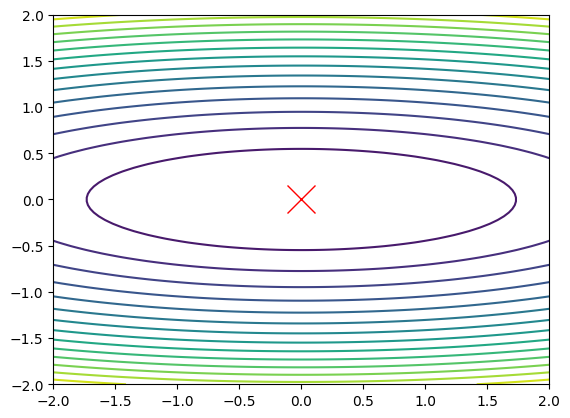

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

Total steps:  19


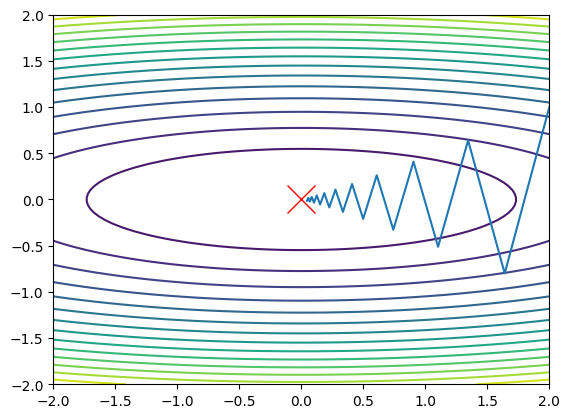

In [3]:
## Define the function and the gradient

def f(x, y):
    return x**2 + 10*y**2

def df(x, y):
    dfdx = 2*x
    dfdy = 20*y
    return np.array([dfdx, dfdy])

def gradient_descent(lr):
  # set initial conditions
  x = 2
  y = 1
  x_hist = [x]
  y_hist = [y]
  max_iter = 10000
  count = 0

  # continue descending until tolerance conditions are met (both x and y within 0.05 of 0).

  while (not (np.isclose(x, 0, atol = 0.05) and np.isclose(y, 0, atol = 0.05))):
    x = x - lr*df(x,y)[0]
    y = y - lr*df(x,y)[1]
    x_hist.append(x)
    y_hist.append(y)
    count = count + 1
    if count > max_iter:
      return count, x_hist, y_hist

  return count, x_hist, y_hist

## Try with learning rate 0.09
count, x_hist, y_hist = gradient_descent(0.09)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

Total steps:  10001


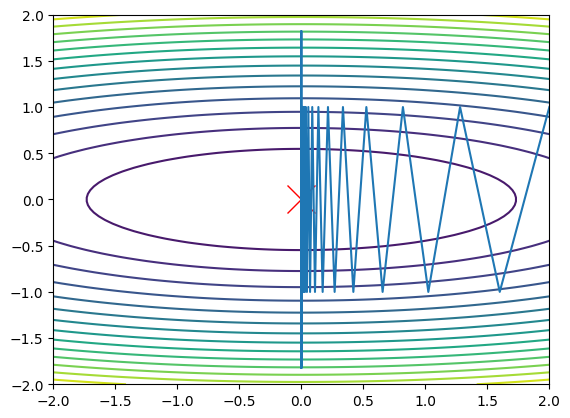

In [4]:
## Try with learning rate 0.100003
count, x_hist, y_hist = gradient_descent(0.100003)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

2. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newton-s-method) will converge to the minimum in a single step.


Using Newton's method avoids the problem of selecting a learning rate hyperparameter.

In it, the step we take is given by:
$$ x_{t+1} - x_t = -H^{-1} \nabla f(x,y)$$
where H is the Hessian of f(x,y).

Start by computing the Hessian and gradient:

$$\nabla f(x,y) = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial x}]^T = [2x, 20y]^T$$

$$H = \begin{pmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x}  & \frac{\partial^2 f}{\partial y^2}
\end{pmatrix}
= \begin{pmatrix}
2&0\\
0 & 20
\end{pmatrix}$$

Then,
$$H^{-1} = \begin{pmatrix}
\frac{1}{2}&0\\
0 & \frac{1}{20}
\end{pmatrix}$$

So, the first step is given by:

$$\epsilon = -H^{-1} \nabla f(x,y) = - \begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{20}
\end{pmatrix} \begin{pmatrix}
2x\\
20y
\end{pmatrix}= \begin{pmatrix}
x\\
y
\end{pmatrix}$$

Hence, at (2,1), the first step is (-2,-1) bringing us to the global minimum at (0,0) in a single step.

3. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

With the tolerance I defined, I was unable to find a learning rate that allows momentum to coverge in less than 20 steps. The closest I got was a learning rate of 0.065, where "convergence" was achieved in 21 steps.

Total steps:  21


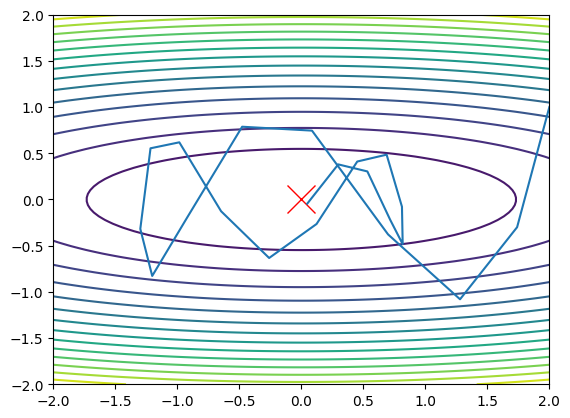

In [6]:
def momentum_gradient_descent(lr):
  # set initial conditions
  x = 2
  y = 1
  x_hist = [x]
  y_hist = [y]
  mom_x = 0
  mom_y = 0
  max_iter = 100
  count = 0
  beta = 0.9

  # Only optimize for 100 steps

  while (not (np.isclose(x, 0, atol = 0.05) and np.isclose(y, 0, atol = 0.05))):

    mom_x = beta*mom_x + df(x,y)[0]
    mom_y = beta*mom_y + df(x,y)[1]

    x = x - lr*mom_x
    y = y - lr*mom_y
    x_hist.append(x)
    y_hist.append(y)
    count = count + 1
    if count >= max_iter:
      return count, x_hist, y_hist

  return count, x_hist, y_hist

count, x_hist, y_hist = momentum_gradient_descent(0.065)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

The highest learning rate I could find while converging in 100 steps was 0.189. A higher learning rate causes divergence so that we do not end close to the minimum in 100 steps.

Total steps:  46


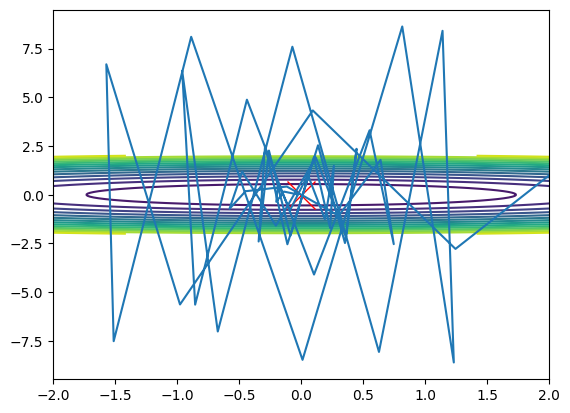

In [7]:
count, x_hist, y_hist = momentum_gradient_descent(0.189)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

The lowest learning rate I could find while converging in 100 steps was 0.0014. A lower learning rate resulted in not reaching "close" to the minimum in 100 steps as we are learning "too slow".

Total steps:  97


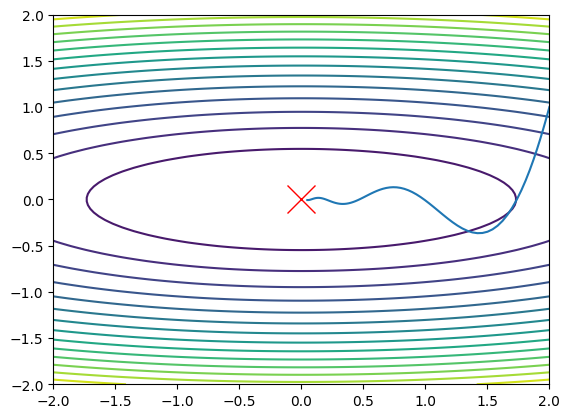

In [8]:
count, x_hist, y_hist = momentum_gradient_descent(0.0014)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

4. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

Total steps:  3535


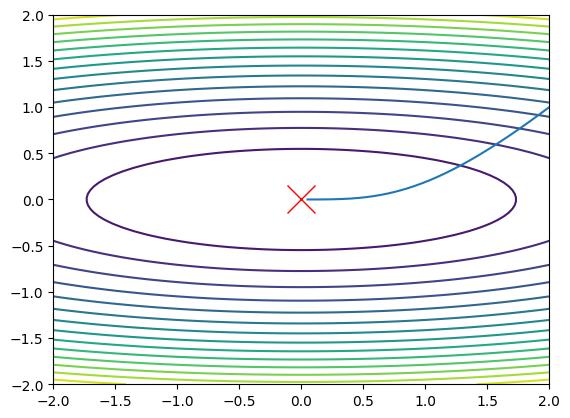

In [ ]:
def adam(lr):
  # set initial conditions
  x = 2
  y = 1
  x_hist = [x]
  y_hist = [y]
  mom_x = 0
  mom_y = 0
  sec_mom_x = 0
  sec_mom_y = 0
  max_iter = 10000
  count = 0
  beta_one = 0.9
  beta_two = 0.999
  e = 1e-6

  # continue descending until tolerance conditions are met (both x and y within 0.05 of 0).

  while (not (np.isclose(x, 0, atol = 0.05) and np.isclose(y, 0, atol = 0.05))):

    mom_x = beta_one*mom_x + (1-beta_one)*df(x,y)[0]
    mom_y = beta_one*mom_y + (1-beta_one)*df(x,y)[1]
    sec_mom_x = beta_two*sec_mom_x + (1-beta_two)*df(x,y)[0]**2
    sec_mom_y = beta_two*sec_mom_y + (1-beta_two)*df(x,y)[1]**2

    mom_x_adj = mom_x/(1-beta_one**(count+1))
    mom_y_adj = mom_y/(1-beta_one**(count+1))
    sec_mom_x_adj = sec_mom_x/(1-beta_two**(count+1))
    sec_mom_y_adj = sec_mom_y/(1-beta_two**(count+1))

    g_adj_x = lr*mom_x_adj/(sec_mom_x_adj**0.5 + e)
    g_adj_y = lr*mom_y_adj/(sec_mom_y_adj**0.5 + e)

    x = x - g_adj_x
    y = y - g_adj_y

    x_hist.append(x)
    y_hist.append(y)
    count = count + 1
    if count > max_iter:
      return count, x_hist, y_hist

  return count, x_hist, y_hist

count, x_hist, y_hist = adam(0.001)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

It took 3535 steps for Adam to converge with a learning rate 0.001.

For a learning rate of 0.189 (the highest value from 1.3 where there is convergence in 100 steps), Adam converges in 32 steps.

Total steps:  32


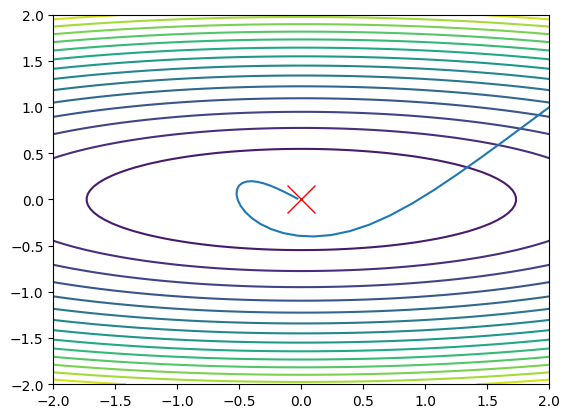

In [ ]:
count, x_hist, y_hist = adam(0.189)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

# Problem 2 (2 points)

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

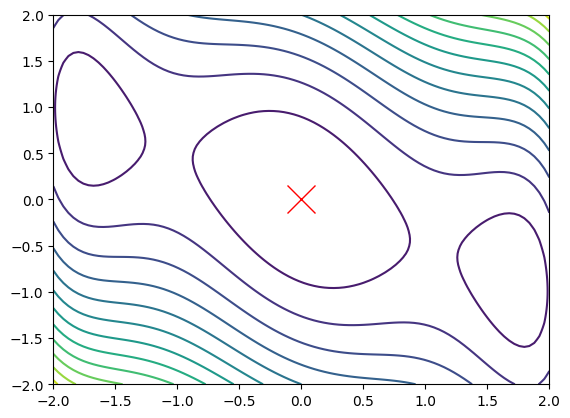

In [ ]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

**Answer:**

The best learning rate I could find for each optimizer are listed below. Overall, the best optimizer and learning rate I could find was the SGD optimizer with a learning rate of 0.4.

SGD: lr of 0.4 converged in 4 steps

Momentum: lr of 0.03 converged in 33 steps

Adam: lr of 0.6 converged in 11 steps

Total steps:  4


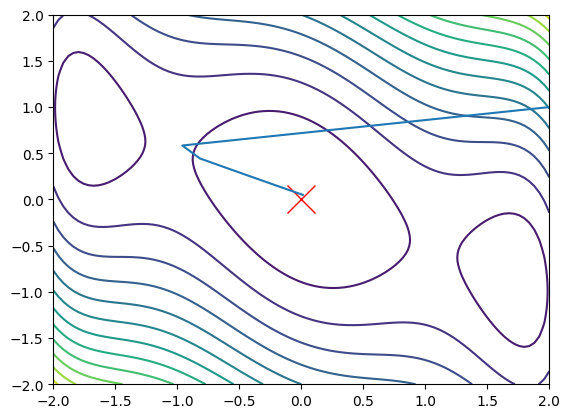

In [ ]:
# Define the new function and its gradient

def f(x, y):
    return 2*x**2 - 1.05*x**4 + x**6/6 +x*y + y**2

def df(x, y):
    dfdx = 4*x - 4.2*x**3 + x**5 + y
    dfdy = x + 2*y
    return np.array([dfdx, dfdy])

## SGD:

count, x_hist, y_hist = gradient_descent(0.4)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')




Total steps:  33


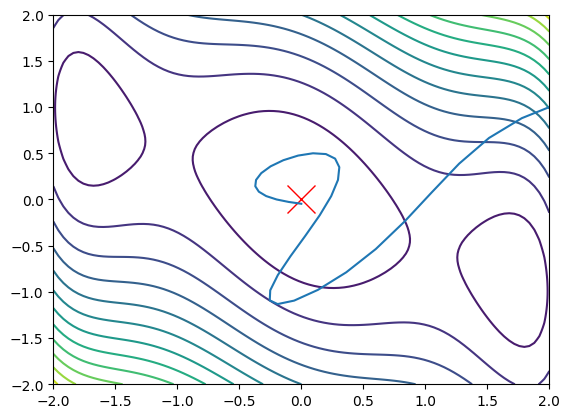

In [ ]:
## Momentum Optimizer

count, x_hist, y_hist = momentum_gradient_descent(0.03)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')

Total steps:  11


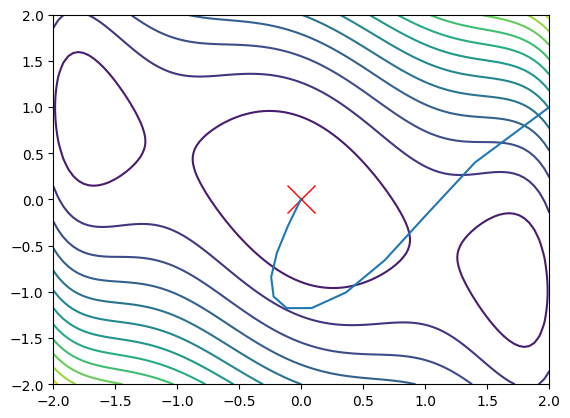

In [ ]:
# Adam Optimizer

count, x_hist, y_hist = adam(0.6)
print("Total steps: ", count)

plot_contour()
plt.plot(x_hist, y_hist, '-')
